In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix
import joblib
from sklearn.ensemble import RandomForestClassifier



In [4]:
census_data_url = 'https://github.com/dsrscientist/dataset1/blob/master/census_income.csv?raw=true'

df =pd.read_csv(census_data_url)

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df.value_counts().sum()

32560

In [12]:
df.duplicated().sum()

24

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [14]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [16]:
df.nunique().sum()

22145

In [17]:
for column in df.columns:
    print(f"{column} = {df[df[column] == '?'].shape[0]}")

Age = 0
Workclass = 0
Fnlwgt = 0
Education = 0
Education_num = 0
Marital_status = 0
Occupation = 0
Relationship = 0
Race = 0
Sex = 0
Capital_gain = 0
Capital_loss = 0
Hours_per_week = 0
Native_country = 0
Income = 0


In [22]:
corr_gain = df[['Fnlwgt', 'Capital_gain']].corr()


In [23]:
corr_gain

,Fnlwgt,Capital_gain
Fnlwgt,1.000000,0.000437
Capital_gain,0.000437,1.000000


In [24]:
corr_loss=df[['Fnlwgt','Capital_loss']].corr()

In [25]:
corr_loss

,Fnlwgt,Capital_loss
Fnlwgt,1.000000,-0.010259
Capital_loss,-0.010259,1.000000


It shows there is neglibile amount of correleation between the 'final weight 'and 'capital loss'

In [26]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fnlwgt'}>],
       [<Axes: title={'center': 'Education_num'}>,
        <Axes: title={'center': 'Capital_gain'}>],
       [<Axes: title={'center': 'Capital_loss'}>,
        <Axes: title={'center': 'Hours_per_week'}>]], dtype=object)

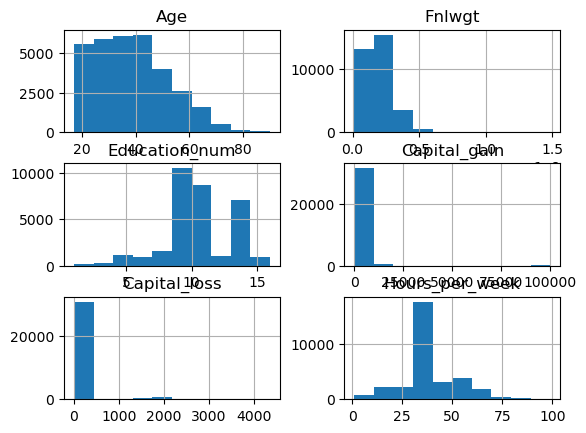

In [31]:
df.hist()

In [32]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [39]:
df.value_counts().T

Age  Workclass          Fnlwgt  Education      Education_num  Marital_status       Occupation          Relationship    Race    Sex      Capital_gain  Capital_loss  Hours_per_week  Native_country  Income
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K    3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K    2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K     2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0             40       

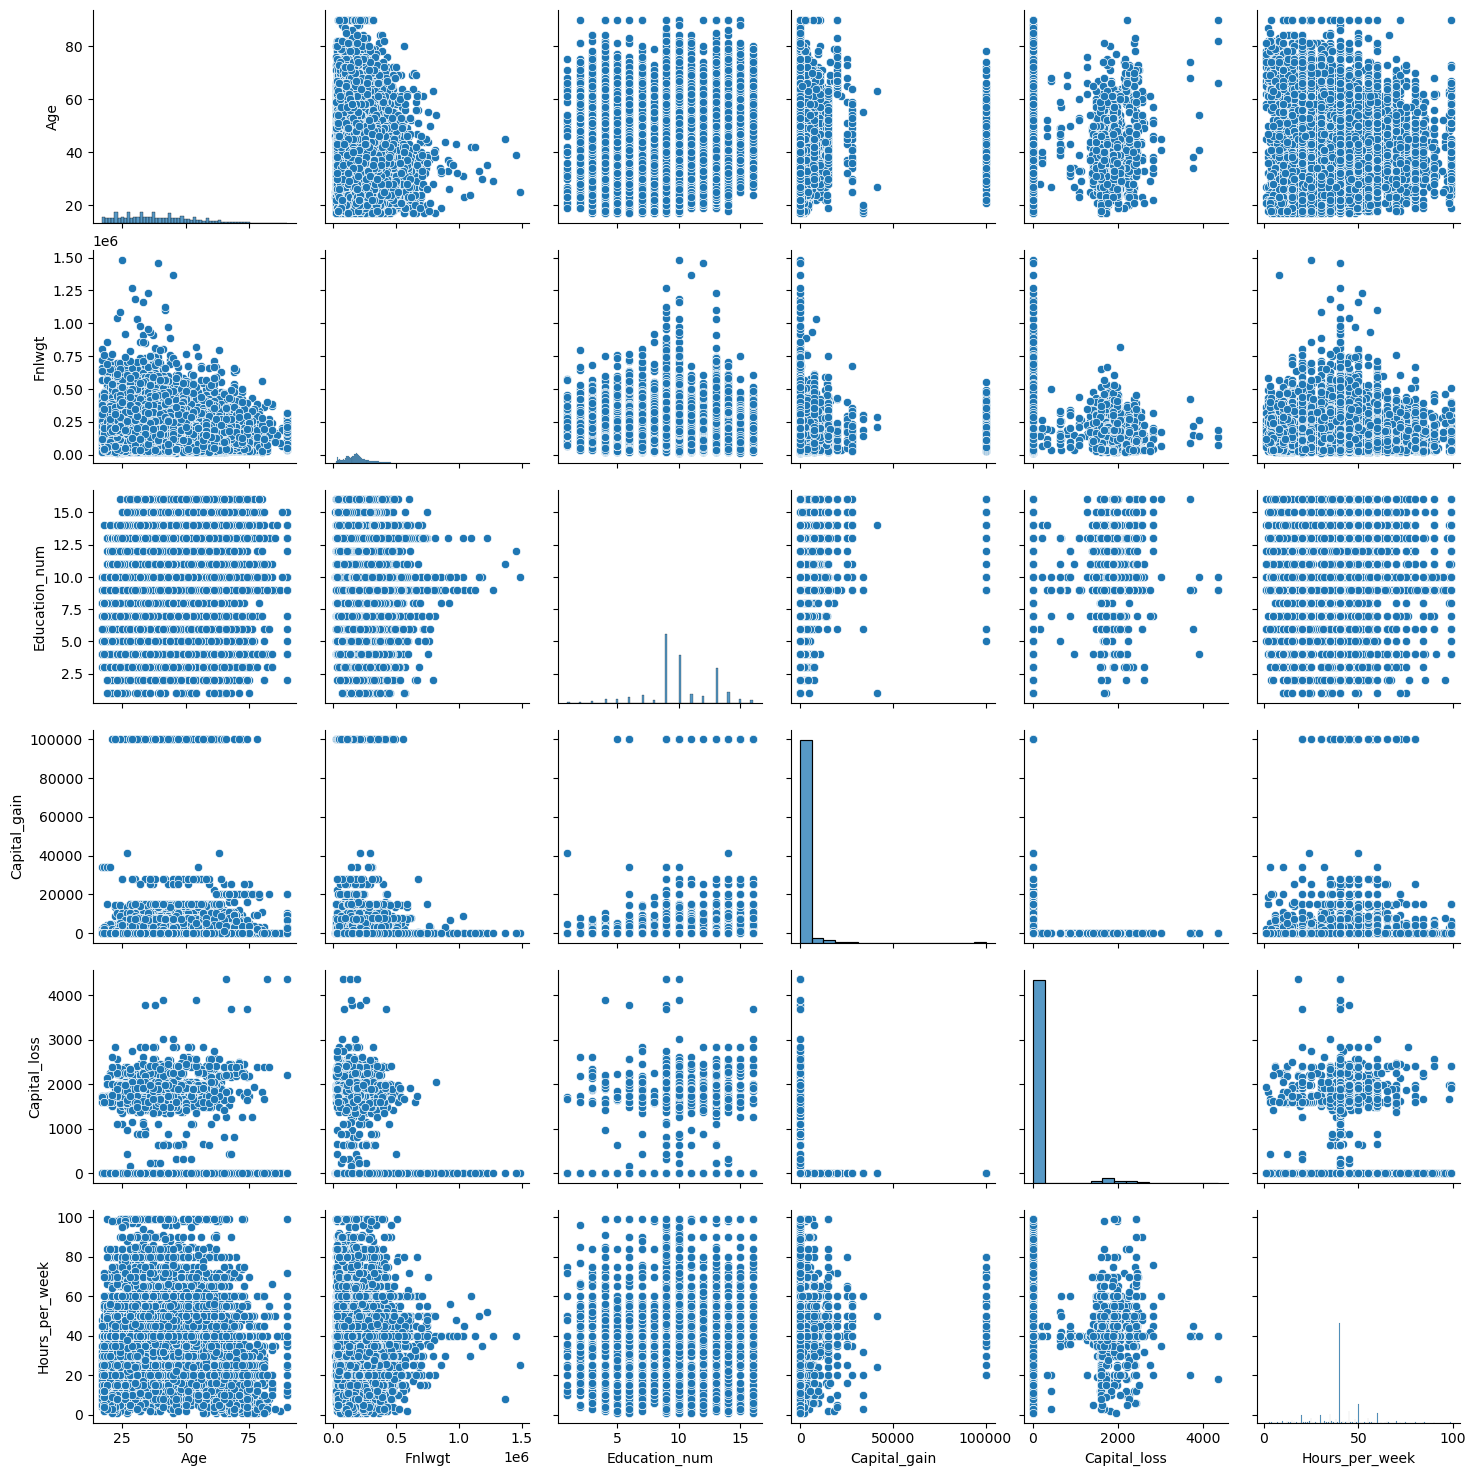

In [38]:
sns.pairplot(df)

In [40]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [41]:
df['Age'].max()

90

In [42]:
df['Age'].min()

17

In [44]:
len(df[(df['Age'] > 16) & (df['Age'] <= 25)])

6411

In [45]:
len(df[(df['Age'] > 25) & (df['Age'] <= 32)])

5877

In [46]:
len(df[(df['Age'] > 32) & (df['Age'] <= 40)])

6829

In [47]:
len(df[(df['Age'] > 40) & (df['Age'] <= 50)])

6983

In [49]:
len(df[(df['Age'] > 50)])

6460

In [51]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [65]:
numerical_col=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [66]:
numerical_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

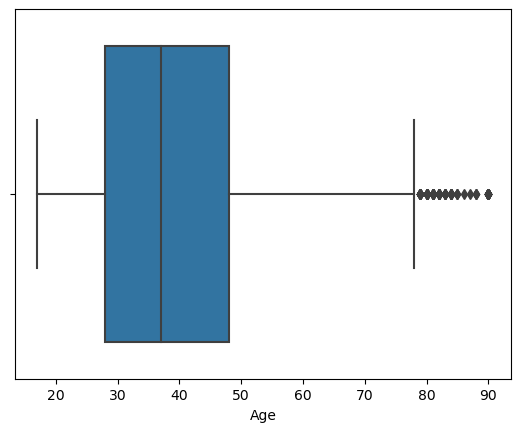

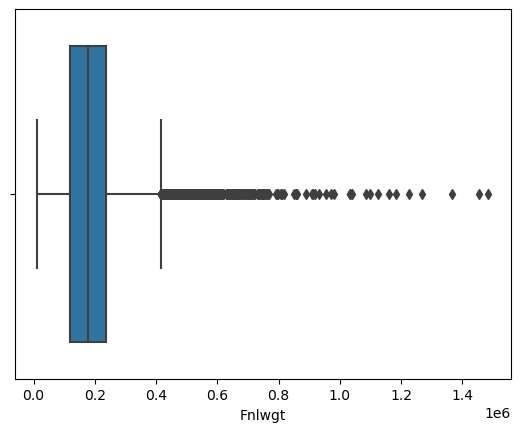

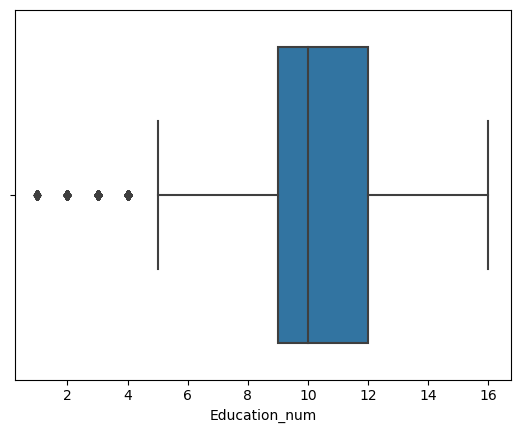

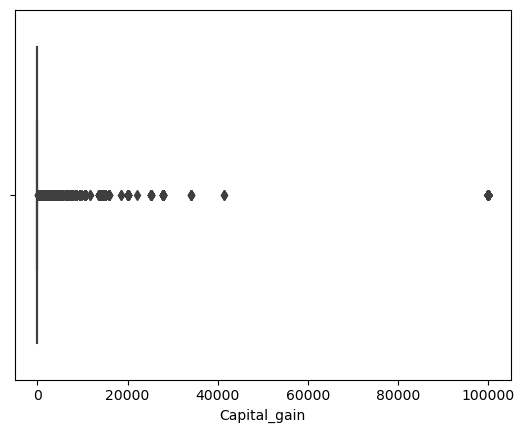

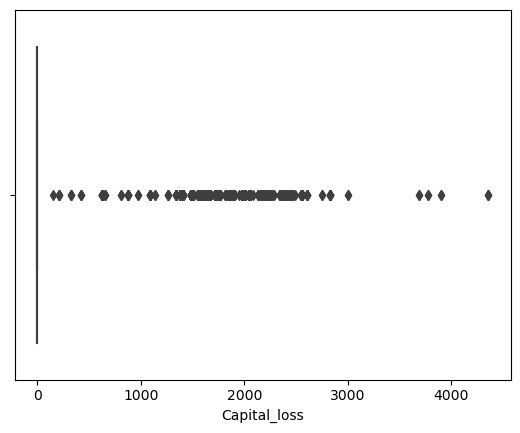

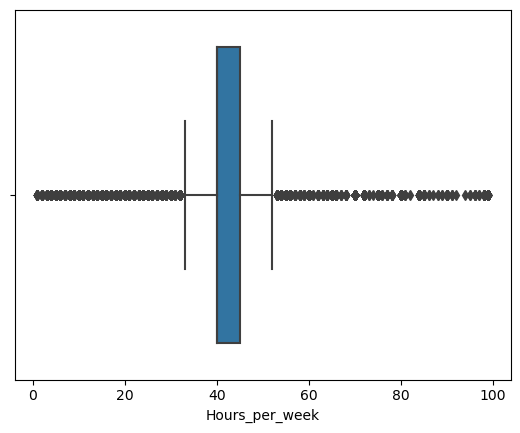

In [67]:
for i in numerical_col:
    sns.boxplot(x=df[i])
    plt.show()

In [69]:
temp=df[df["Income"] == '>50K']


In [70]:
temp

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [71]:
country_vs_age=df[['Native_country','Income','Age']].groupby(['Native_country','Income']).mean()

In [74]:
country_vs_age = country_vs_age.reset_index()


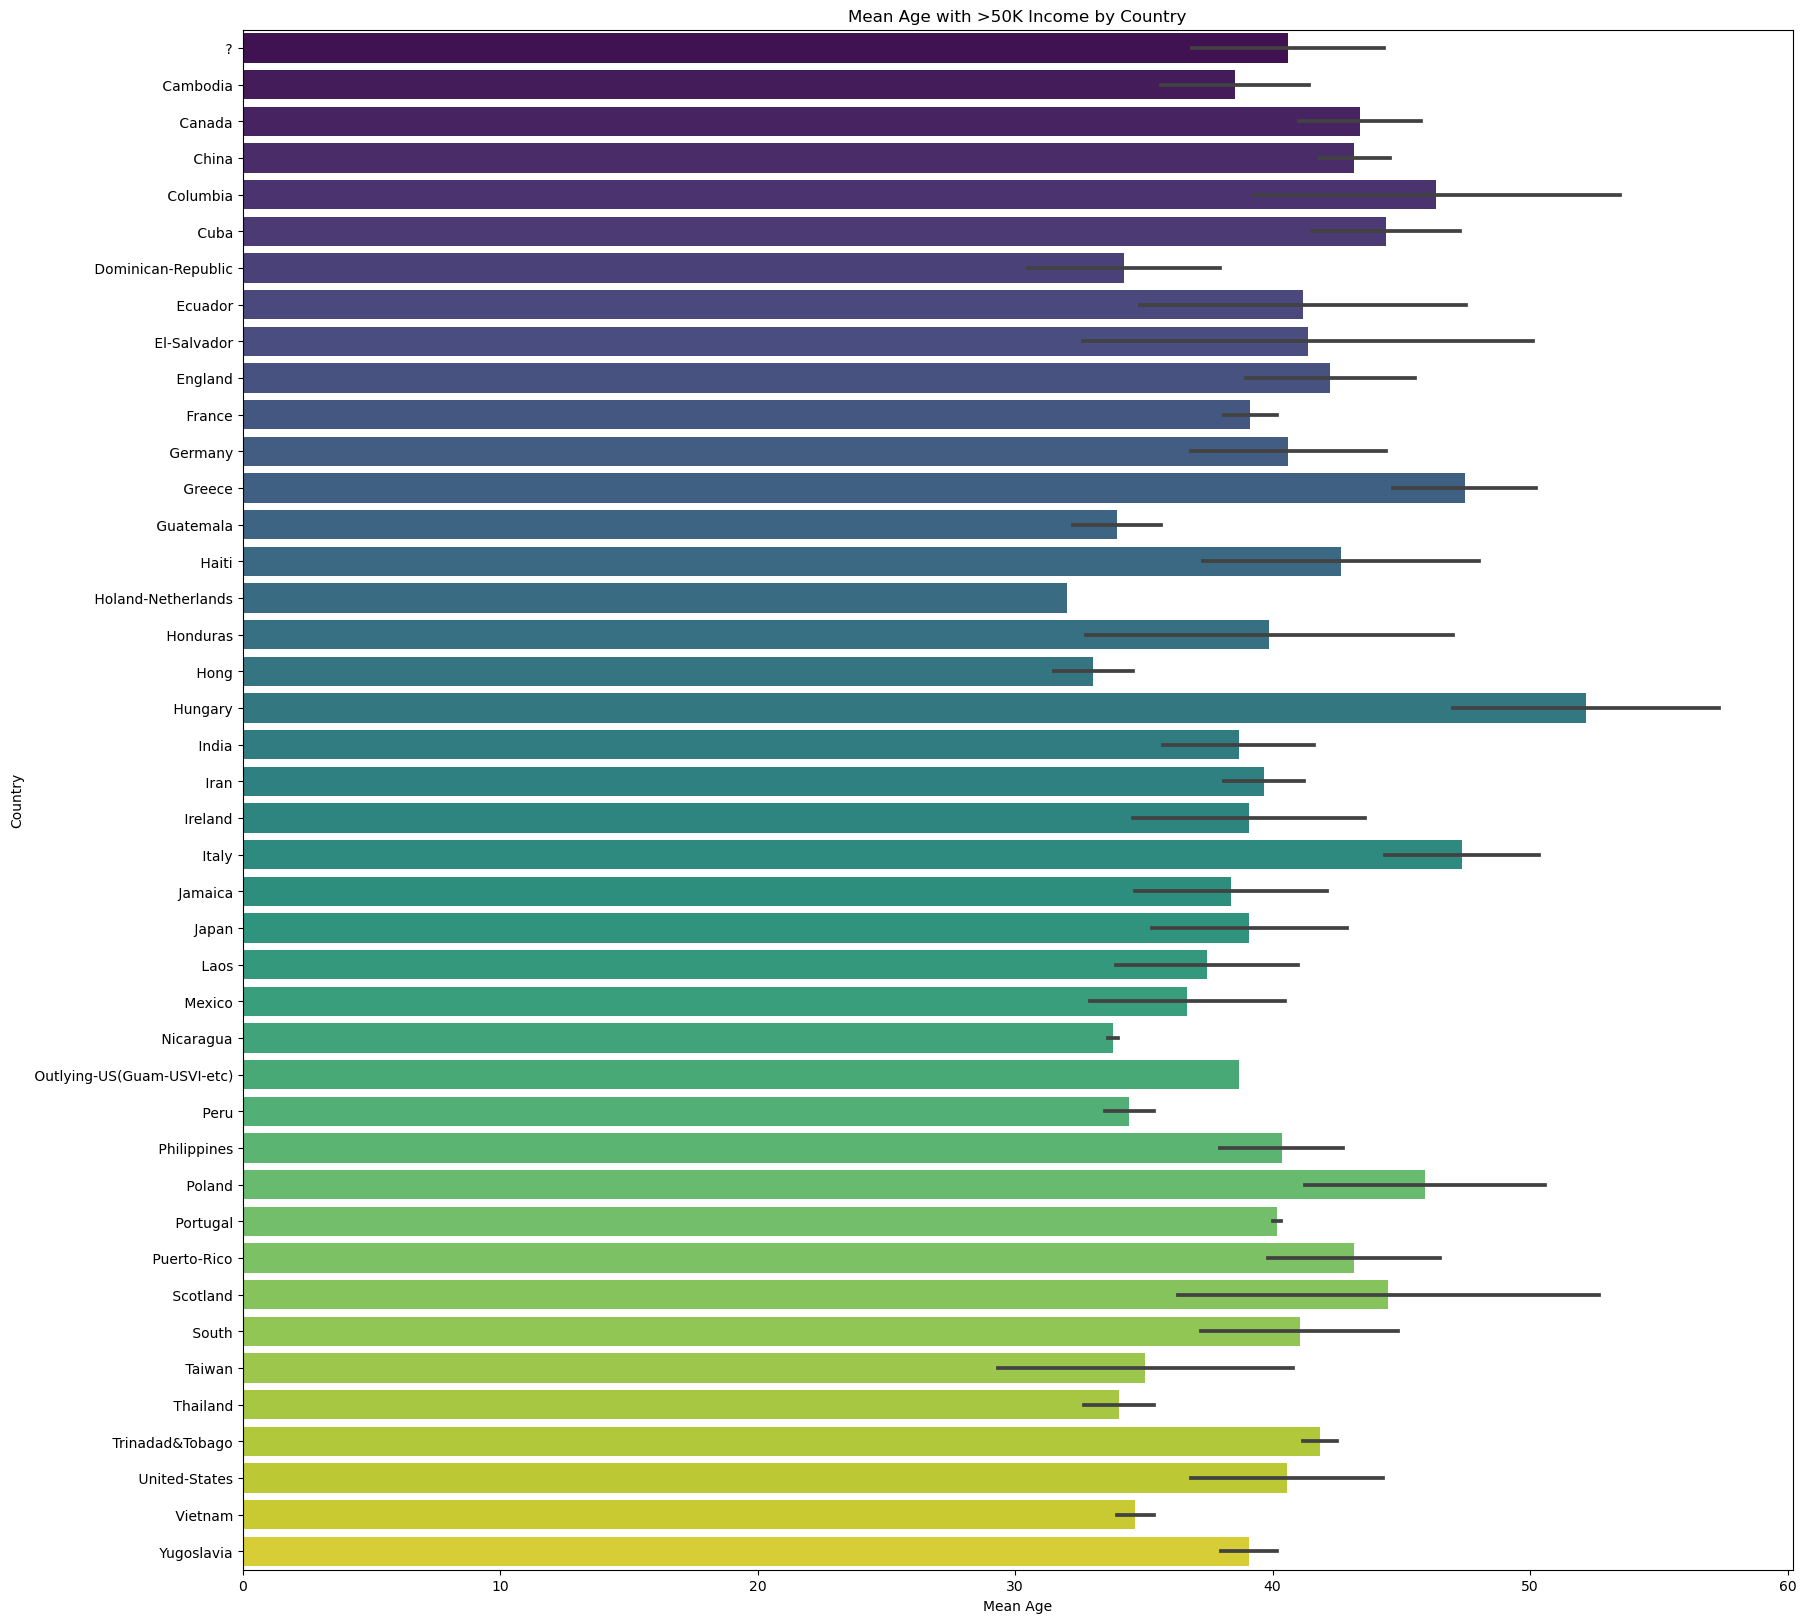

In [75]:
plt.figure(figsize = (20,20))
sns.barplot(x="Age",y ="Native_country",data=country_vs_age,palette="viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()

In [77]:
education_data=temp.groupby('Education')['Income'].count()

In [78]:
education_data

Series([], Name: Income, dtype: int64)

In [79]:
education_data = education_data.reset_index()

In [80]:
plt.figure(figsize = (20,20))
sns.barplot(x="Education",y ="Income",data=education_data,palette="viridis")
plt.xlabel("Education Level")
plt.ylabel("greater than 50k")
plt.title("greater than 50k vs Education Level ")
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 2000x2000 with 0 Axes>

In [6]:
df_clean=df.drop_duplicates(inplace=True)

In [11]:
zero_capital_gain_count=df[df['Capital_gain'] == 0].shape[0]
zero_capital_loss_count=df[df['Capital_loss'] == 0].shape[0]

In [14]:
zero_capital_gain_count


29825

In [13]:
zero_capital_loss_count

31017

In [15]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['number'])
scaler = StandardScaler()
num_cols_scaled = scaler.fit_transform(num_cols)
num_cols

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [17]:
num_cols = df.select_dtypes(include=['number'])
scaler = StandardScaler()
df[num_cols.columns] = scaler.fit_transform(num_cols)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,Self-emp-not-inc,-1.008703,Bachelors,1.134817,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145969,-0.216747,-2.222450,United-States,<=50K
1,-0.042934,Private,0.245008,HS-grad,-0.420646,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145969,-0.216747,-0.035664,United-States,<=50K
2,1.056935,Private,0.425720,11th,-1.198377,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145969,-0.216747,-0.035664,United-States,<=50K
3,-0.776180,Private,1.408036,Bachelors,1.134817,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145969,-0.216747,-0.035664,Cuba,<=50K
4,-0.116259,Private,0.898091,Masters,1.523683,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.145969,-0.216747,-0.035664,United-States,<=50K


In [18]:
df=pd.get_dummies(df,columns=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'])
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.836961,-1.008703,1.134817,-0.145969,-0.216747,-2.222450,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042934,0.245008,-0.420646,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.056935,0.425720,-1.198377,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.776180,1.408036,1.134817,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.116259,0.898091,1.523683,-0.145969,-0.216747,-0.035664,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_enc = df.copy()
df_enc['Income'] = label_encoder.fit_transform(df['Income'])
df_enc.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.836961,-1.008703,1.134817,-0.145969,-0.216747,-2.222450,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042934,0.245008,-0.420646,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.056935,0.425720,-1.198377,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.776180,1.408036,1.134817,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.116259,0.898091,1.523683,-0.145969,-0.216747,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


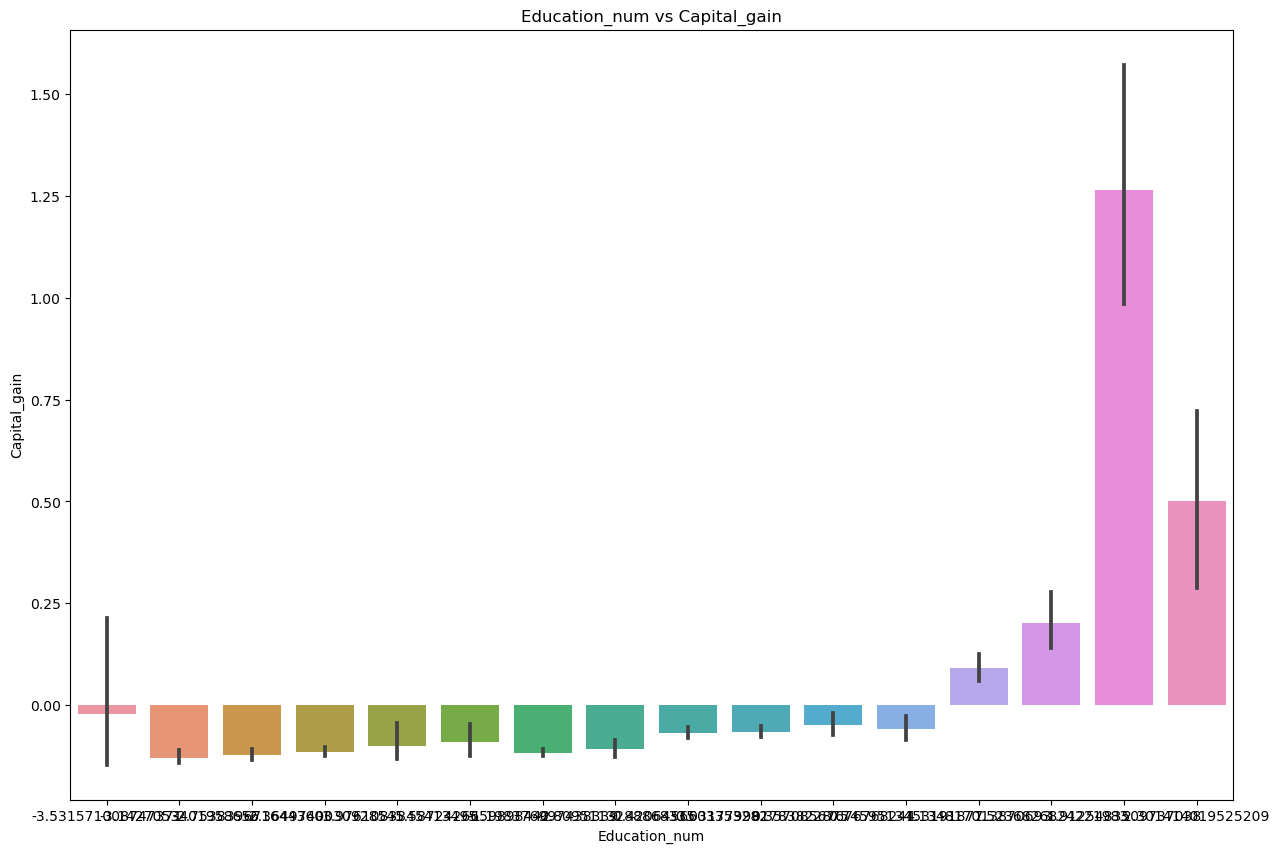

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='Education_num',y='Capital_gain',data=df)
plt.title('Education_num vs Capital_gain')
plt.show()

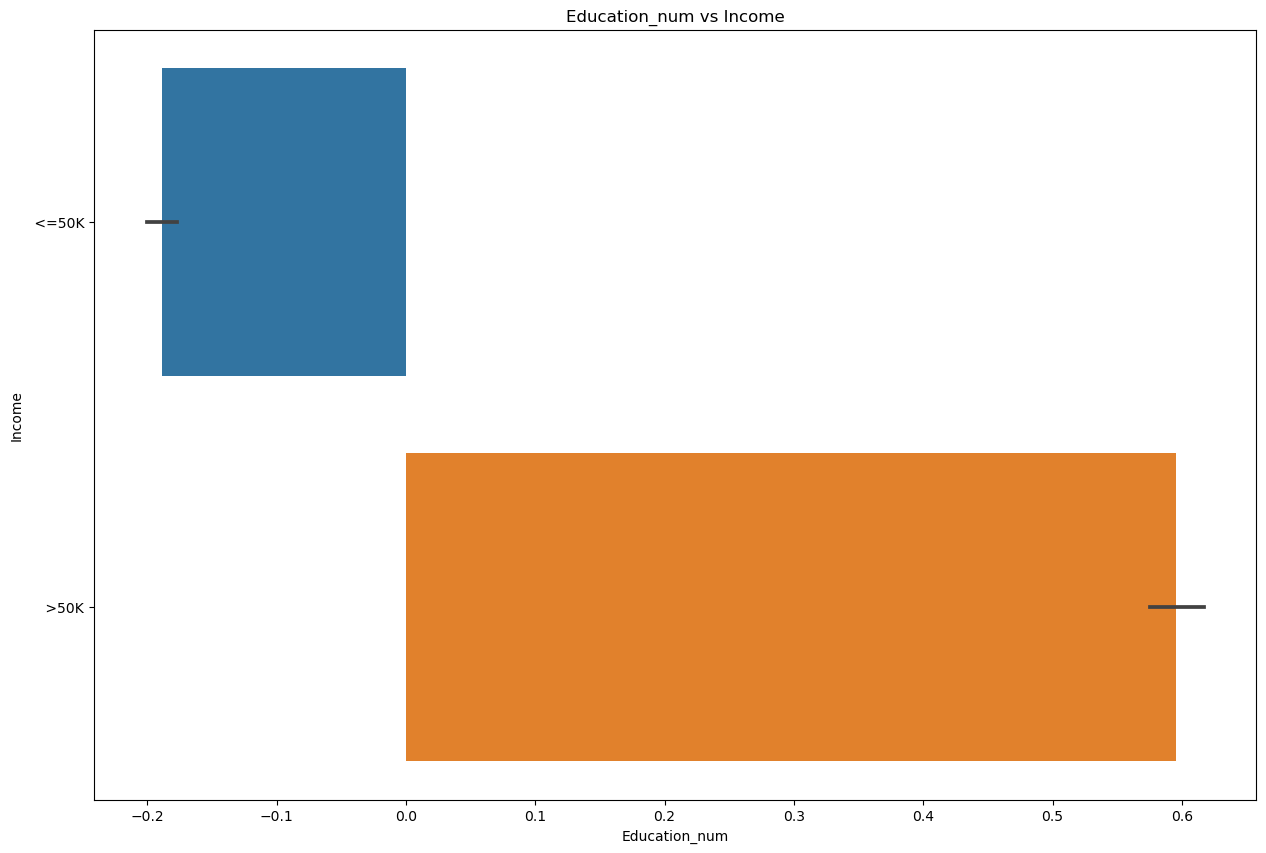

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='Education_num',y='Income',data=df)
plt.title('Education_num vs Income')
plt.show()

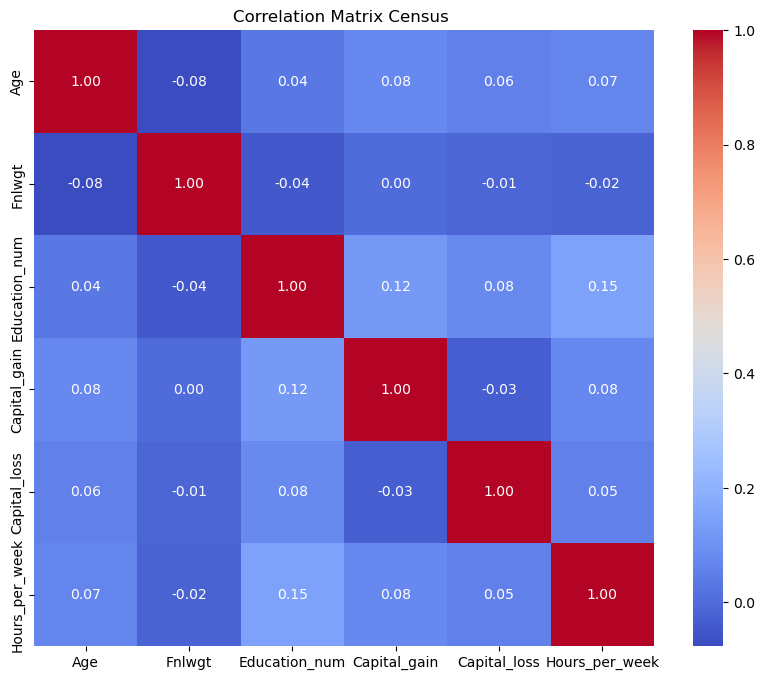

In [22]:
numerical_df= df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Census ')
plt.show()

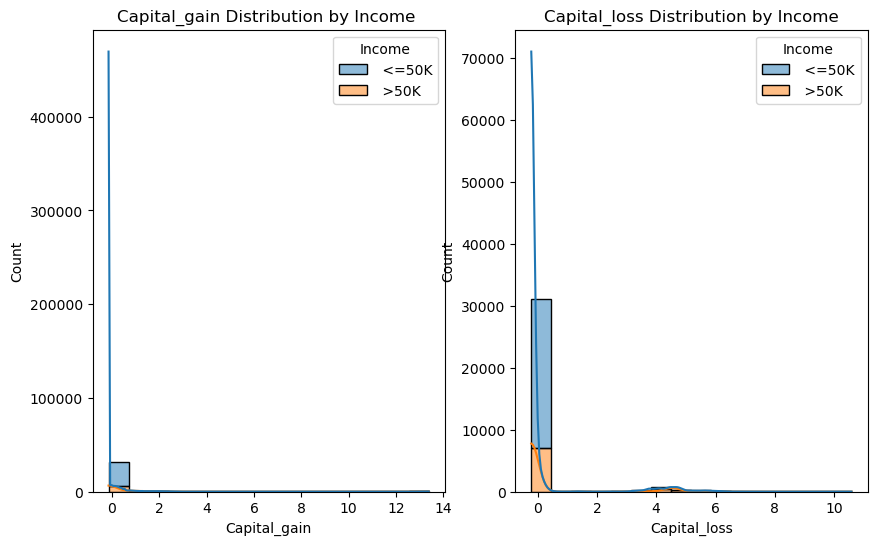

In [23]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(df,x = 'Capital_gain',hue='Income',multiple='stack', kde =True)
plt.title('Capital_gain Distribution by Income ')

plt.subplot(1,2,2)
sns.histplot(data =df,x='Capital_loss', hue='Income',multiple='stack', kde =True)
plt.title('Capital_loss Distribution by Income')
plt.show()

In [24]:
incom_analysis =df.groupby('Income')[['Capital_gain','Capital_loss']].describe()
incom_analysis

Capital_gain                                                    \
              count      mean       std       min       25%       50%   
Income                                                                  
 <=50K      24697.0 -0.125827  0.130414 -0.145969 -0.145969 -0.145969   
 >50K        7839.0  0.396423  1.972413 -0.145969 -0.145969 -0.145969   

                            Capital_loss                                \
             75%        max        count      mean       std       min   
Income                                                                   
 <=50K -0.145969   5.445565      24697.0 -0.084789  0.771260 -0.216747   
 >50K  -0.145969  13.389441       7839.0  0.267130  1.477433 -0.216747   

                                                 
             25%       50%       75%        max  
Income                                           
 <=50K -0.216747 -0.216747 -0.216747  10.589464  
 >50K  -0.216747 -0.216747 -0.216747   8.919909

In [25]:
y = df_enc['Income']
df_enc.drop('Income', axis=1, inplace=True)
X = df_enc

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Lr_model = LogisticRegression()
Lr_model.fit(X,y)

LogisticRegression()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
y_pred = Lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8551014136447449


In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


print("Coefficients:\n",Lr_model.coef_)

Confusion Matrix:
[[4630  331]
 [ 612  935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4961
           1       0.74      0.60      0.66      1547

    accuracy                           0.86      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Coefficients:
 [[ 0.34702605  0.07332617  0.72717594  2.31234099  0.25882721  0.36600357
  -0.20808628  0.56664582 -0.09946428 -0.10250866  0.07856641  0.25035449
  -0.40726185 -0.23122747 -0.89411072 -0.08316046 -0.27446223 -0.15450412
   0.42417166  0.47951035  0.00256775  0.00268849 -0.43007251 -0.13604941
  -0.12253962  0.08486801 -0.11215079 -0.04457133 -0.79949062  0.16470024
  -0.04859796 -0.68767778  1.54892899  1.32940787 -0.69501067 -1.17045065
  -0.80888732 -0.56340298 -0.31059494  0.09913419 -0.27149424  0.177921
   0.88163575 -0.88903812 -0.5664287  -0.18690029 -0.72367384 -1.64666556


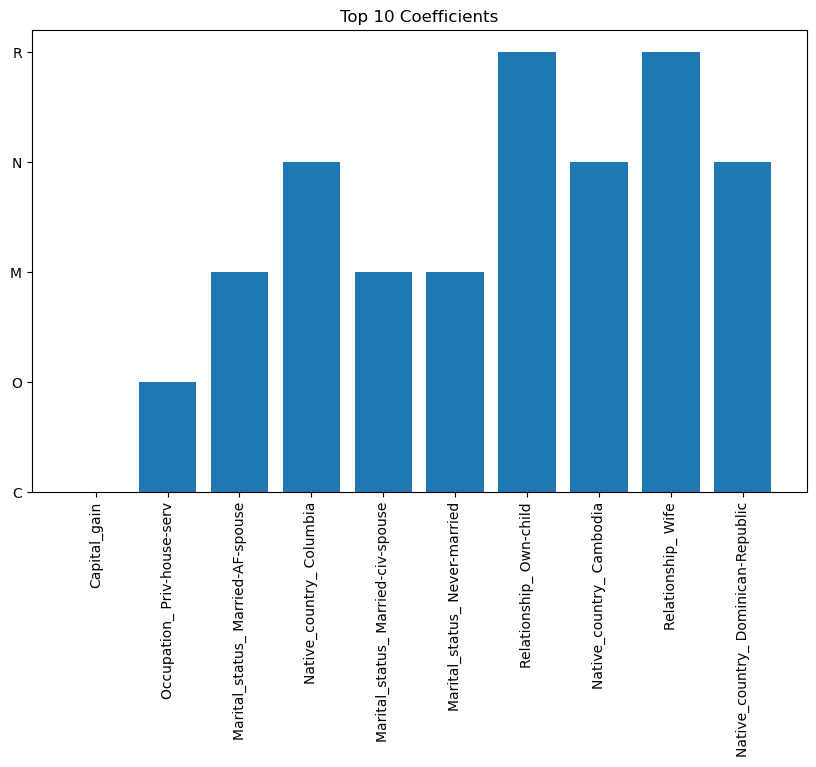

In [30]:
coefficients = Lr_model.coef_[0]
#top_coefficients = coefficients.argsort()[-10:][::-1]

feature_names = list(X.columns)
coef_feature_pairs = list(zip(coefficients, feature_names))
top_coefficients = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), reverse=True)[:10]
top_coefficients = [x[1] for x in top_coefficients]
plt.figure(figsize=(10, 6))
plt.bar(top_coefficients, [x[0] for x in top_coefficients])
plt.xticks(rotation=90)
plt.title('Top 10 Coefficients')
plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.768837592562648

Accuracy: 0.8534111862323295


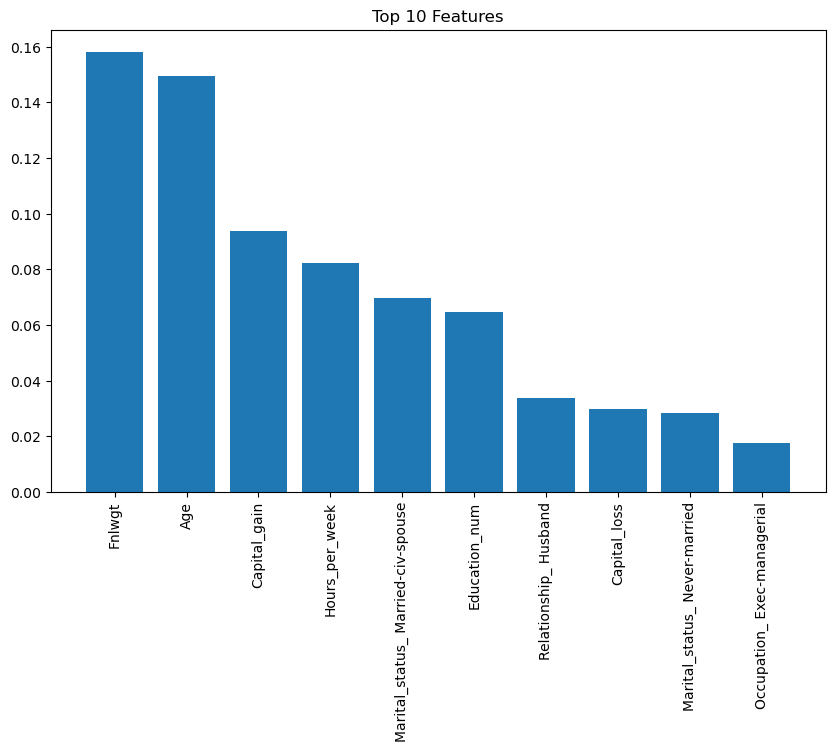

In [32]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier()
Rf_model.fit(X_train,y_train)
y_pred = Rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

importances = Rf_model.feature_importances_
feature_imp_df =  pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
top_n =10
top_features = feature_imp_df.head(top_n)
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Features')
plt.show()